In [4]:
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from scipy.stats import bootstrap

import brainbox
from brainbox.physiology import neural
import pandas as pd

from src import analysis

import matplotlib
matplotlib.rcParams["svg.fonttype"] = "none"
matplotlib.rcParams["font.family"] = "Arial"

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [5]:
root = "/home/luketaylor/PycharmProjects/NeuralPred"

In [ ]:
pvc1_query = analysis.PVC1ModelQuery(root)
cadena_query = analysis.CadenaModelQuery(root)

## Best model comparison

In [9]:
rename_mapping = {"bwt": "BWT", "prednet": "PredNet", "stack_compression_4-6-8_True": "Autoencoder", "stack_prediction_4-6-2_True": "Prediction", "stack_slowness_4-6_True": "Slowness", "vgg": "VGG"}
ordering = ["vgg", "bwt", "prednet", "stack_compression_4-6-8_True", "stack_slowness_4-6_True", "stack_prediction_4-6-2_True"]
rename_ordering = [rename_mapping[name] for name in ordering]
colors = sns.color_palette("bright")[:7]
target_color = sns.color_palette("bright")[7]

In [10]:
best_pvc1 = pvc1_query.get_best_df()
best_pvc1["model"] = best_pvc1["model"].map(rename_mapping)

best_cadena  = cadena_query.get_best_df()
best_cadena["model"] = best_cadena["model"].map(rename_mapping)

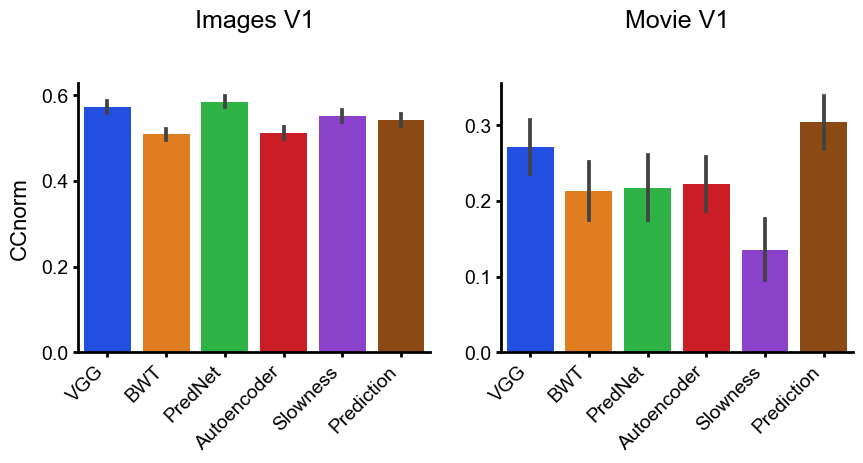

In [16]:
def plot_best_model_comparison(data, ax):
    sns.barplot(data=data, x="model", y="cc_norm", estimator='mean', order=rename_ordering, errorbar=("se"), palette=colors, ax=ax)
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")
    ax.set_xlabel("", fontsize=16, labelpad=8)
    ax.spines["top"].set_visible(False)
    ax.spines["right"].set_visible(False)
    ax.spines["bottom"].set_linewidth(2)
    ax.xaxis.set_tick_params(width=2, labelsize=14)
    ax.spines["left"].set_linewidth(2)
    ax.yaxis.set_tick_params(width=2, labelsize=14)
    
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10, 3.5))
plot_best_model_comparison(best_cadena, ax[0])
plot_best_model_comparison(best_pvc1, ax[1])

ax[0].set_title("Images V1", fontsize=18, pad=40)
ax[1].set_title("Movie V1", fontsize=18, pad=40)
ax[0].set_ylabel("CCnorm", fontsize=16, labelpad=8)
ax[1].set_ylabel("", fontsize=16, labelpad=8)
plt.savefig("/home/luketaylor/PycharmProjects/image.svg", format="svg", transparent=False, bbox_inches="tight")